In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [31]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col='date')
df.head(5)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [8]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.head(5)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


# Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

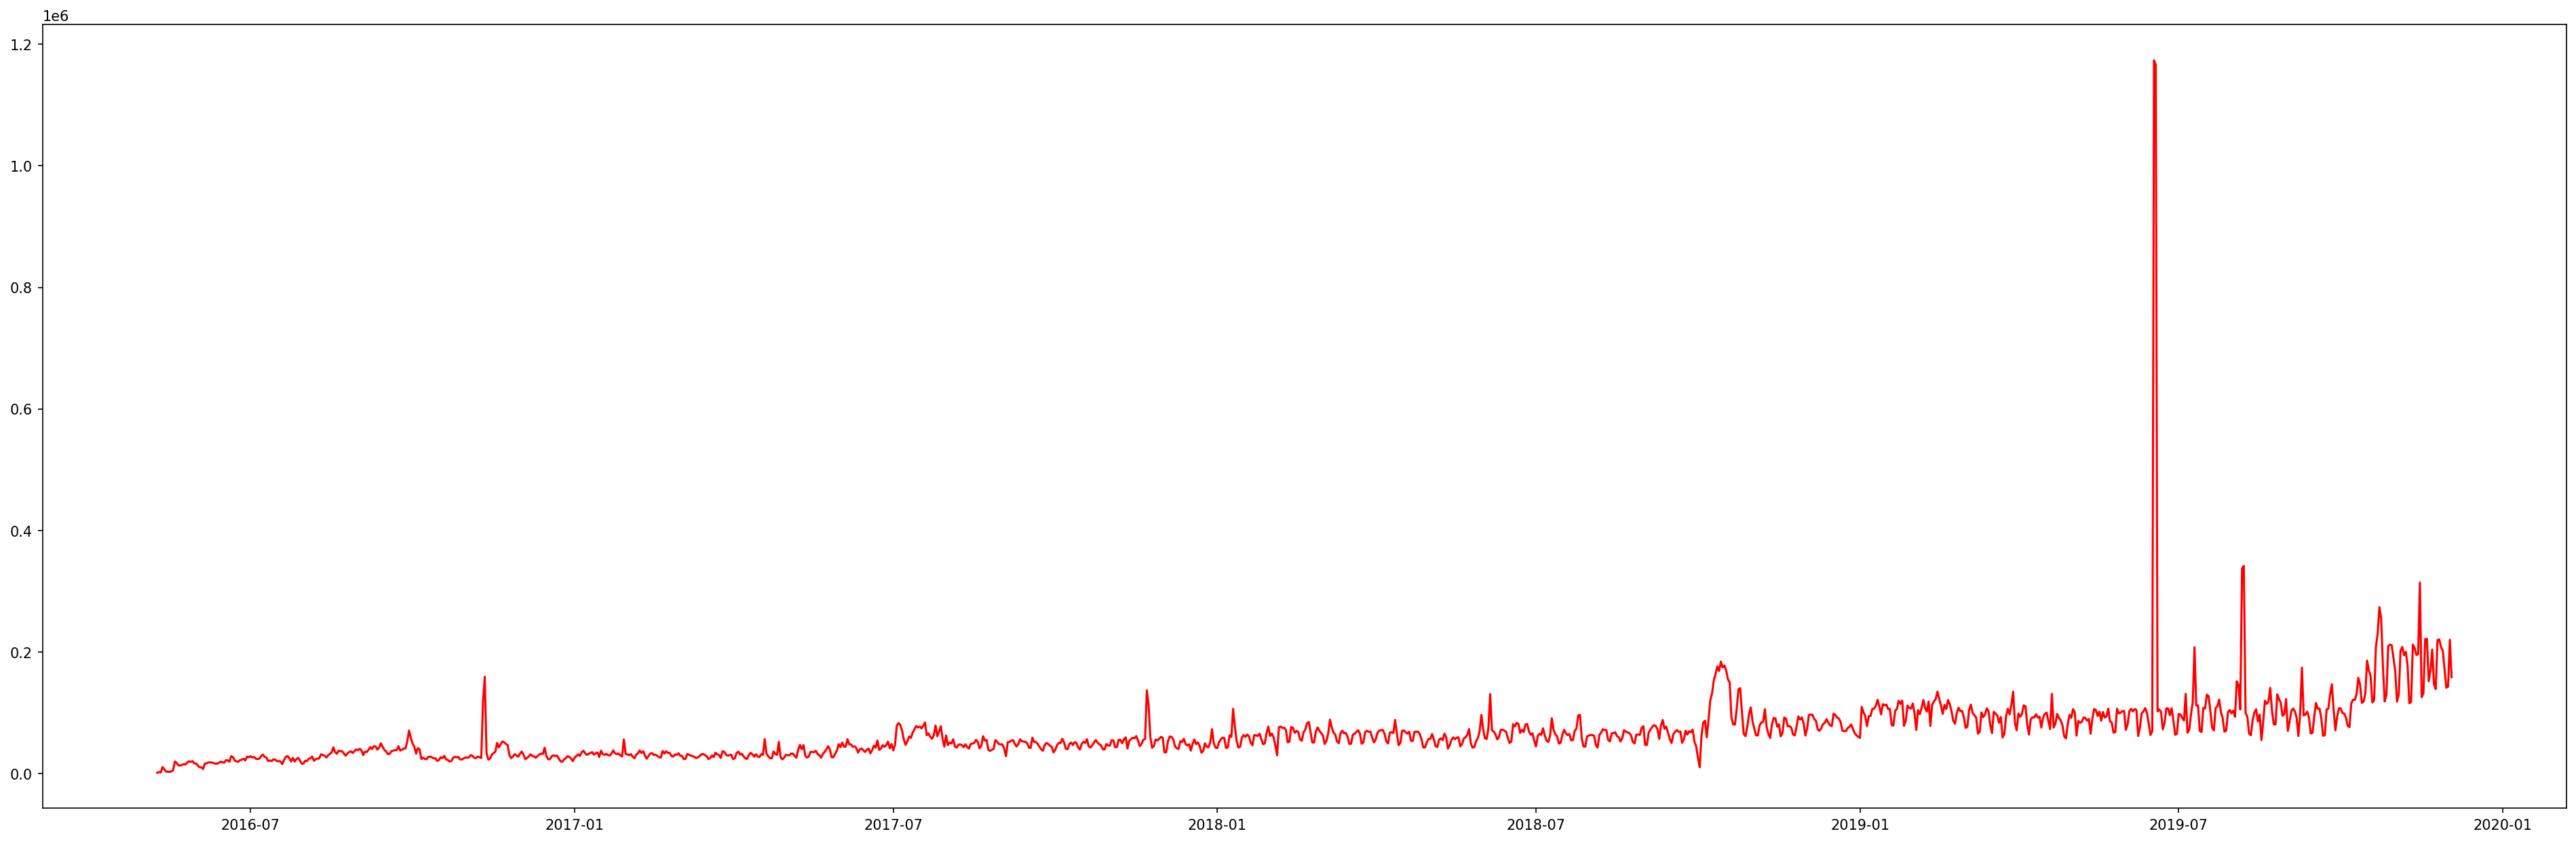

In [39]:
fig,ax = plt.subplots(figsize=(32, 10), dpi=150)
ax.plot(df.index, df['value'], color='r')

# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

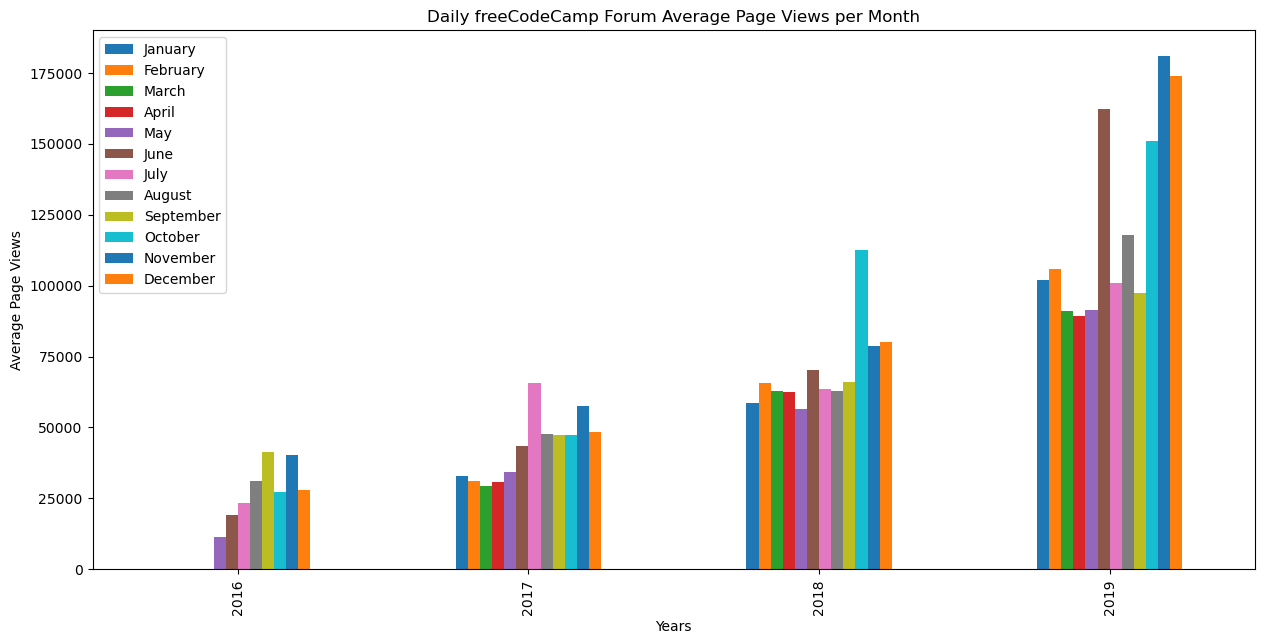

In [38]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month
df_bar = df_bar.groupby(['year','month']).mean()
df_bar=df_bar.unstack()
fig = df_bar.plot.bar(legend=True , figsize=(15,7), xlabel='Years', ylabel='Average Page Views').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Daily freeCodeCamp Forum Average Page Views per Month')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data

In [40]:
# Code provided by the FreeCodeCamp
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

 # Draw box plots (using Seaborn)

Text(0, 0.5, 'Page views')

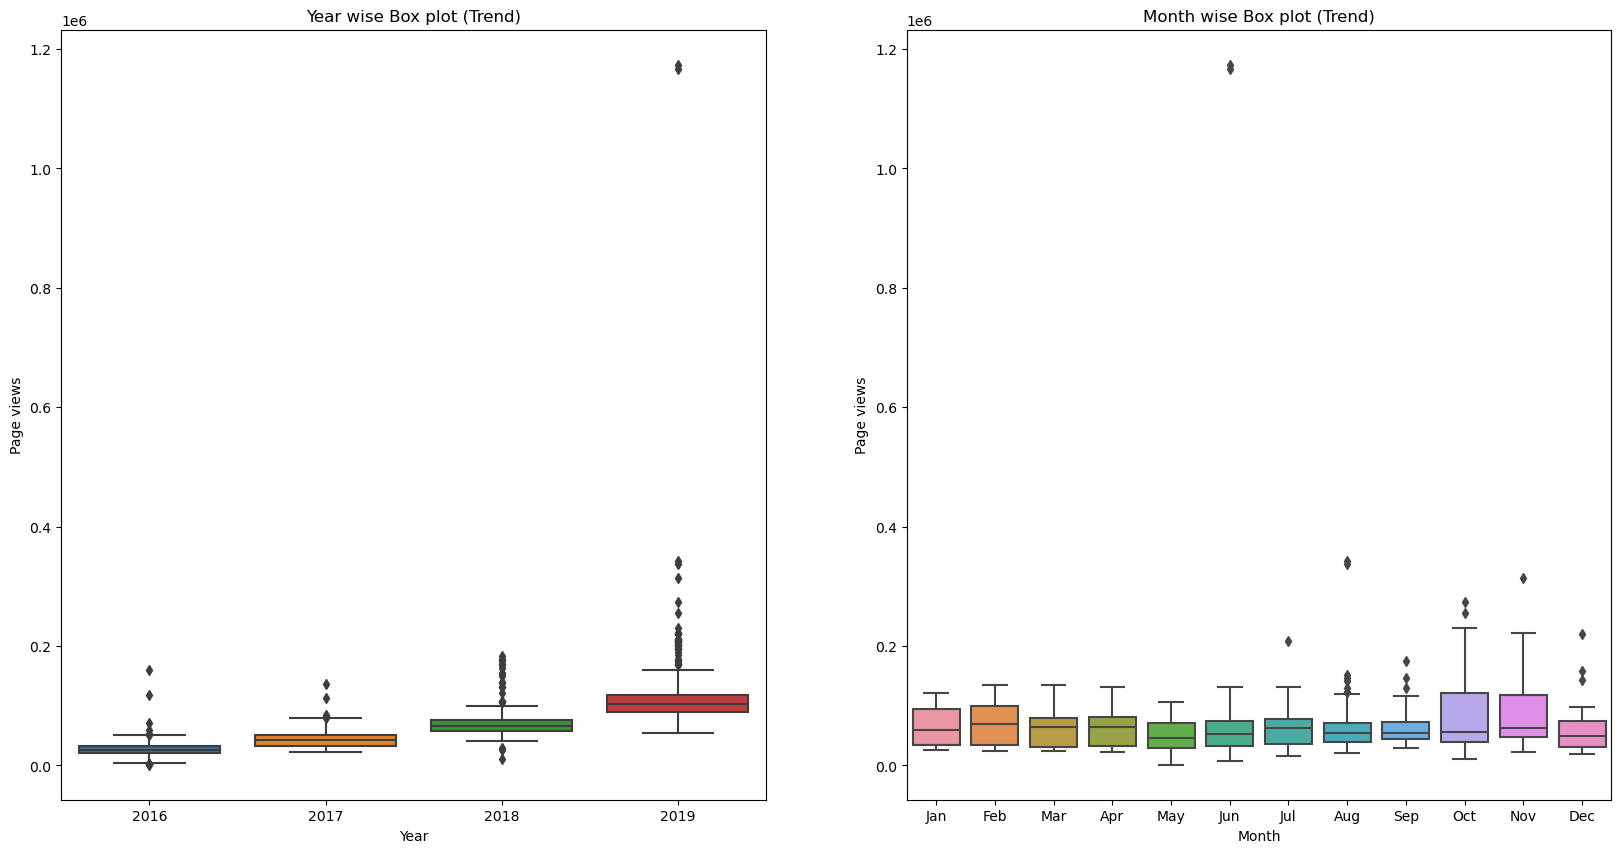

In [43]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')

fig,ax = plt.subplots(ncols = 2 , nrows = 1, figsize=(20,10)) # Cauz we need 2 columns of graph but in single row
ax[0] = sns.boxplot(x = df_box['year'], y = df_box['value'], ax = ax[0]) # specifying our first graph is year wise
ax[1] = sns.boxplot(x = df_box['month'], y = df_box['value'], ax = ax[1]) # specifying our Second graph is month wise
ax[0].set_title('Year wise Box plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page views')

ax[1].set_title('Month wise Box plot (Trend)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page views')